In [58]:
import numpy as np
import matplotlib.pyplot as plt 

import importlib

import components as comp
importlib.reload(comp);

In [59]:
### Parameters
computational_states    = 3
resonator_states        = 20


# Define the components, which are defined in components.py

# The superconducting qubit
transmon = comp.Transmon(
    n_cutoff        = 11,
    e               = 1.519e6,              # GHz / V
    EJ              = 34,                   # GHz hbar
    EJ_EC_ratio     = 128,                  # Gives EC = EJ / ratio
    # gamma           = 2.5                 # EJ2 / EJ1    
)

# Resonator for readout
resonator = comp.Resonator(
    omega           = 6.02,                 # GHz
    n_cutoff        = resonator_states      # States of harmonic oscillator
)


## Defining Hamiltonians
We can now define the hamiltonians of the system:

In [60]:
# Find subspace of Transmon
Es, Psis = transmon.eigen_basis(computational_states)   # Get states and energies for transmon
H0_transmon = np.diag(Es - Es[0])                       # Set E0 = 0


# H0 of the resonator is simply found by:
H0_resonator    = resonator.Hamiltonian().todense()


# We need to define mathematical tools to combine the system
transmon_identity   = np.identity(n = computational_states)
resonator_identity  = np.identity(n = resonator_states)

# Combine the Hamiltonians by tensor product 
H0_transmon_big  = np.kron(H0_transmon,         resonator_identity)
H0_resonator_big = np.kron(transmon_identity,   H0_resonator)

# Sum to get full H0 in 3 x 20 space
H0 = H0_transmon_big + H0_resonator_big


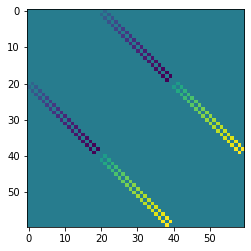

In [61]:
# Transmon interaction
H_overlap_n = np.conjugate(Psis).T @ transmon.n_matrix() @ Psis

#### NEED MORE THEORY TO DEFINE THIS INTERACTION TERM #### 
# Now we just assume g_k = 1. Probably we take the overlap between them.
H_int_resonator = (resonator.a_dagger() + resonator.a()).todense()

# Direct product to get it in 3 x 20 hilbert space
H_int = np.kron(H_overlap_n, H_int_resonator)


plt.imshow(H_int)

## Interaction Eigenvalues 

In [65]:
interaction_strength = 0.130 # GHz 

H = H0 + 0.130 *  H_int